# T2 - Mecánica Estadística - Anexo

### P1 - A
Implemente el algoritmo direct-pi (clase 4, slide 7). Usando $N = 10,100,...,10^8,$ corralo
20 veces cada vez. Usando data de estos runs, muestre que $Nhits/N$ converge a $\pi/4$, estime
la desviación cuadr ́atica media $⟨(Nhits/N −π/4)^2⟩$ y graf ́ıquelo como funci ́on de $N$. ¿Cómo
escala la desviaci ́on cuadrática media con N?

Como el la razon de las areas de un circulo inscrito en un cuadrado es: 

$$\frac{A_{cir}}{A_{sq}}\ =\ \frac{\pi r^2}{(2r)^2}  $$

$$\ \ \  \ \ \ \ \ \ \ \ \ \frac{A_{cir}}{A_sq}\ =\ \frac{\pi}{4}\ = \ \frac{N_{hints}}{N}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import math
%matplotlib inline
from numba import jit
from tqdm import tqdm

In [21]:
@jit
def direct_pi(N):
    N_hints = 0
    for i in (range(N)):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        r = math.sqrt(x**2 + y**2)
        if r <= 1:
            N_hints += 1
    return N_hints/N

In [22]:
desv_por_N = []
for i in (range(8)):
    meansure_por_run = []
    for j in range(20):
        meansure_por_run.append(direct_pi(10**(i+1)))
        if i>6 and j == 10:
            print("50%")
        if i>6 and j == 15:
            print("75%")    
    desv_por_N.append(np.mean((np.array(meansure_por_run) - np.pi/4)**2))
data_1A = desv_por_N

50%
75%


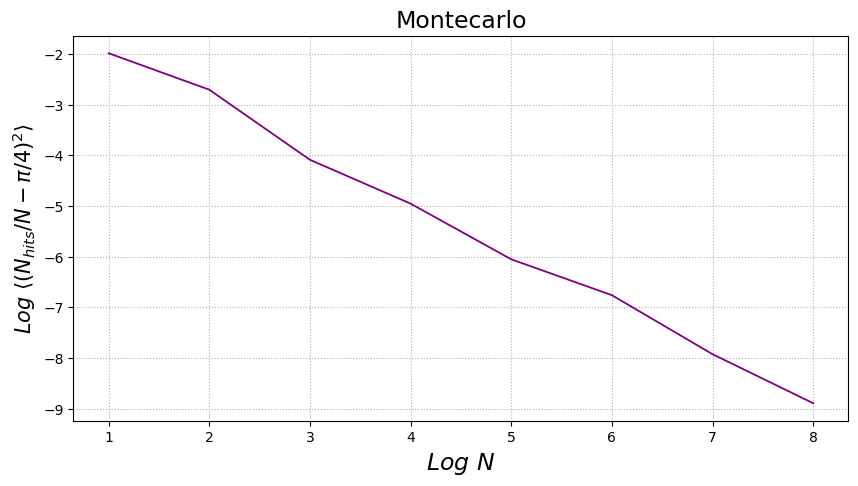

In [26]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)

axes.plot(np.arange(1,9,1),np.log10(data_1A), c= 'purple', lw = 1.3)

axes.set_title(r'Montecarlo',fontsize=17)
axes.set_ylabel(r'$Log\ ⟨(N_{hits}/N −π/4)^2⟩$', fontsize= 15)
axes.set_xlabel(r'$Log \ N$', fontsize= 17)
plt.grid(True,ls = ':')


# P1 - B
Implemente y corra elalgoritmo markov-pi (clase 4, slide 10), empezando desde la posición
$(x_0,y_0) = (1,1)$. Usando un rango de tiro $δ = 0.3$, muestre nuevamente que $N_{hits}/N$ converge a
$π/4$. Luego, estudiaremos la presición obtenidqa como función de $δ$ y verificaremos la validez
de la regla “one-half”: Grafique la desviación cuadrática media $⟨(N_{hits}/N −π/4)^2⟩, para un
$N$ fijo grande, como función de $δ$ en el rango $δ ∈ [0,3]$. Grafique la tasa de rechazo de este
algoritmo como función de $δ$. ¿Para qué valores de la tasa de rechazo se obtiene la mayor
presición?


In [27]:
@jit
def markov_pi(N,delta):
    x, y = 1, 1
    N_hints = 0
    rechazo = 0
    for i in range(N):
        d_x = random.uniform(-delta,delta)
        d_y = random.uniform(-delta,delta)
        if abs(x + d_x) < 1 and abs(y + d_y) < 1:
            x = x + d_x
            y = y + d_y
        else:
            rechazo += 1
        if math.sqrt(x**2 + y**2) < 1:
            N_hints += 1
    return [N_hints/N,rechazo/N]

In [28]:
data_1B = []
for i in tqdm(np.arange(1000,1000000,1000)):
        data_1B.append(markov_pi(i,0.3)[0]*4)


100%|██████████| 999/999 [00:04<00:00, 202.63it/s]


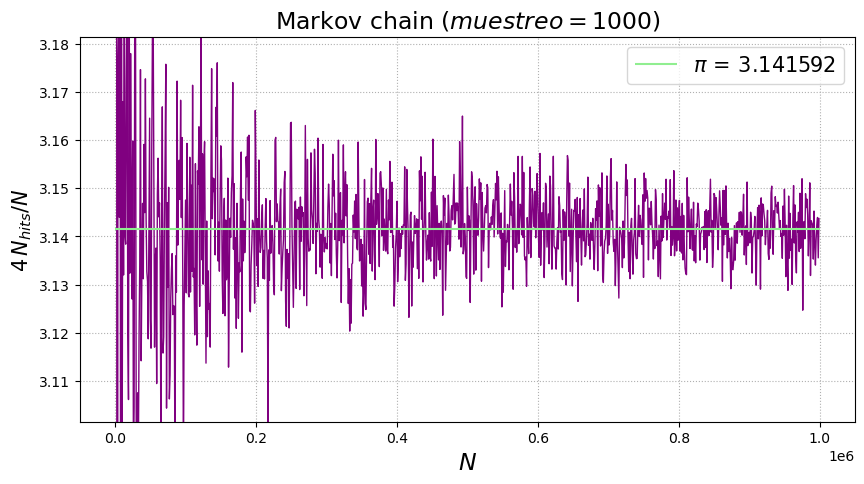

In [31]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)

axes.plot(np.arange(1000,1000000,1000),data_1B, c= 'purple', lw = 1)

axes.hlines(3.141592, 0, 1000000, colors="lightgreen", linestyles='solid', label = r'$\pi\,=\,3.141592$') 

axes.set_title(r'Markov chain ($muestreo = 1000$)',fontsize=17)
axes.set_ylabel(r'$4\, N_{hits}/N$', fontsize= 15)
axes.set_xlabel(r'$N$', fontsize= 17)
epsilon = 0.04
axes.set_ylim(3.1415-epsilon,3.1415+epsilon)
plt.legend(fontsize=15)
plt.grid(True,ls = ':')
plt.show()

In [82]:
data_1B_desv = []
data_1B_rechazo = []
for delta_v in tqdm(np.arange(0,3,0.01)):
    desv = []
    rechazo = []
    for x in range(100):
        par = markov_pi(100000,delta_v)
        desv.append((par[0] - np.pi/4)**2)
        rechazo.append(par[1])
    data_1B_desv.append(np.mean(desv))
    data_1B_rechazo.append(np.mean(rechazo))

100%|██████████| 300/300 [00:39<00:00,  7.55it/s]


In [83]:
distancia_ = np.abs(np.array(data_1B_rechazo) - 0.5)
mejor_delta = np.arange(0,3,0.01)[np.argmin(distancia_)]
print(f"El mejor rango de tiro es delta =", mejor_delta)

El mejor rango de tiro es delta = 1.17


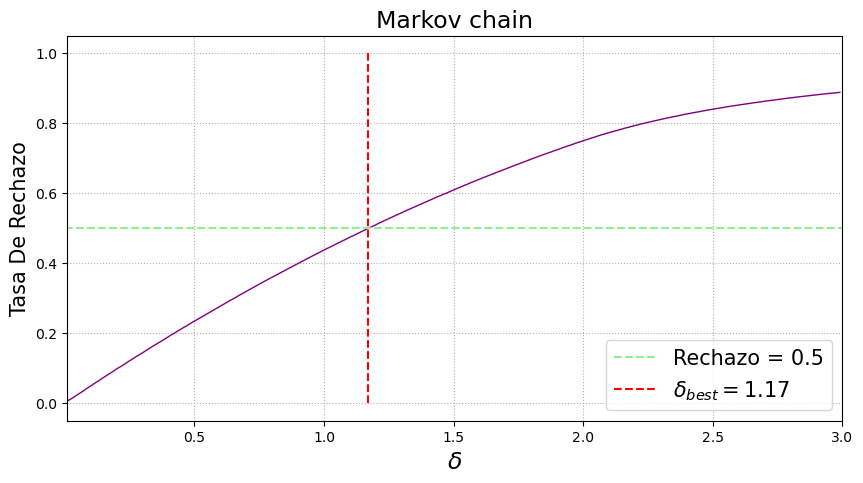

In [84]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)

axes.plot(np.arange(0,3,0.01),data_1B_rechazo, c= 'purple', lw = 1)
axes.hlines(0.5, 0, 3, colors="lightgreen", linestyles='dashed', label = r'Rechazo = 0.5') 
axes.vlines(1.17,0, 1, colors="red", linestyles='dashed', label = r'$\delta_{best}=1.17$') 

axes.set_title(r'Markov chain',fontsize=17)
axes.set_ylabel(r'Tasa De Rechazo', fontsize= 15)
axes.set_xlabel(r'$\delta$', fontsize= 17)
axes.legend(fontsize=15,loc = "lower right")
plt.xlim(0.01,3)
plt.grid(True,ls = ':')
plt.show()

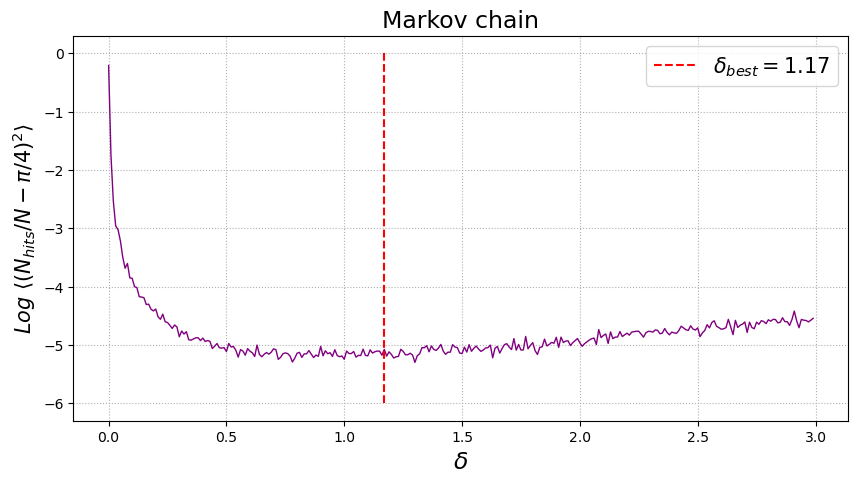

In [85]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)

axes.plot(np.arange(0,3,0.01),np.log10(np.array(data_1B_desv)), c= 'purple', lw = 1)
axes.vlines(1.17,0, -6, colors="red", linestyles='dashed', label = r'$\delta_{best}=1.17$') 

axes.set_title(r'Markov chain',fontsize=17)
axes.set_ylabel(r'$Log\ ⟨(N_{hits}/N −π/4)^2⟩$', fontsize= 15)
axes.set_xlabel(r'$\delta$', fontsize= 17)

plt.legend(fontsize=15)
plt.grid(True,ls = ':')
plt.show()

### P2 - A
Implemente el algoritmo $gray-flip$ (clase 5, slide 14) para $N$ spins. Testeelo imprimiendo
todas las configuraciones posibles para un número $N$ pequeño y comparelas con las de la
tabla en la slide 14, clase 5. Combine este algoritmo con el algoritmo $enumerate-ising$
(clase 5, slide 15) para generar la densidad de estados de las redes cuadradas de dimensiones
$2×2$, $4×4$ y $6×6$ con y sin condiciones de borde periódicas. Consejo: para el caso $6x6$,
asegurese de escoger un formato de data capaz de mostrar todos los digitos.

In [7]:
def gray_flip_gen(d):
    N = d**2
    spins = [-1]*N
    tau = list(range(1,N+2))
    lista_cong = [] 
    lista_cong.append(spins.copy())
    k = 1
    while k <= N:
        spins[k - 1] *= -1
        lista_cong.append(spins.copy())

        tau[k - 1] = tau[k]
        tau[k] = k + 1
        k = tau[0]

        if k != 1:
            tau[0] = 1
    return lista_cong


In [8]:
grid2 = gray_flip_gen(2)
for i in grid2: print(i) 

[-1, -1, -1, -1]
[1, -1, -1, -1]
[1, 1, -1, -1]
[-1, 1, -1, -1]
[-1, 1, 1, -1]
[1, 1, 1, -1]
[1, -1, 1, -1]
[-1, -1, 1, -1]
[-1, -1, 1, 1]
[1, -1, 1, 1]
[1, 1, 1, 1]
[-1, 1, 1, 1]
[-1, 1, -1, 1]
[1, 1, -1, 1]
[1, -1, -1, 1]
[-1, -1, -1, 1]


In [2]:
@jit
def campo_molecular_con_cdp(spins,indice,size):
    h = 0
    col = indice%size
    fil = indice//size

    if col != 0 and col != size -1:
        h += spins[indice + 1]
        h += spins[indice - 1]

    elif col == 0:
        h += spins[indice + 1]
        h += spins[indice + size - 1]

    elif col == size - 1:
        h += spins[indice - 1]
        h += spins[indice - (size - 1)]       


    if  fil != 0 and fil != size - 1:
        h += spins[indice + size]
        h += spins[indice - size]

    elif fil == 0:
        h += spins[indice + size]
        h += spins[indice + size*(size - 1)]


    elif fil == size - 1:
        h += spins[indice - size]
        h += spins[indice%size]

    return h

In [18]:
@jit
def enumerate_ising_con_cdp(d):
    N = d**2
    spins = [1]*N # estado inicial

    tau = list(range(1,N+2)) # Lista auxiliar para contar 
    k = 1 # k-1 sera el elemento flipiado cada vez


    densidad_estado = [0]*(int(N/2) + 1)  # Cantidad de estados: [0,..,2N] con step = 4 - con CDP 
                                          # Se asumiran solo grillas de tamaño par 2x2 - 4x4 - 6x6 (los impares no tienen E = 0)    
    energias = np.arange(0,2*N + 1,4) # Valores posibles de energia con step = 4 para E>=0

    energia_actual = -2*N  # Energia del estado inicial [1,1,1...]
                           # No se cuenta pq es E<0

    # Contador de iteraciones
    z = 0  
    total_iteraciones = 2 ** N  # Número total de configuraciones posibles (2^N)

    # Progress checkpoints (precalculados para tamaños pequeños de grilla)
    progress_checkpoints = [int(total_iteraciones / 4), int(total_iteraciones / 2), int(3 * total_iteraciones / 4)]
    progress_markers = ["25%", "50%", "75%"]
    progress_index = 0


    while k <= N:
            
        spins[k - 1] *= -1  # se flipa el elemento de la lista 

        h = campo_molecular_con_cdp(spins,k-1,d)  # campo molecular en el spin flipiado
        energia_actual += -2*h*spins[k-1]  

        if energia_actual >= 0:  # Solo se suma los casos E=>0
            ind = list(energias).index(energia_actual)
            densidad_estado[ind] += 1

        
        tau[k - 1] = tau[k]  # Sistema de conteo
        tau[k] = k + 1
        k = tau[0]
        if k != 1:
            tau[0] = 1
        z += 1  # Incrementar el contador

        # Imprimir progreso en checkpoints predefinidos
        if progress_index < len(progress_checkpoints) and z == progress_checkpoints[progress_index]:
            print(f"Progreso: {progress_markers[progress_index]}")
            progress_index += 1

    return energias, densidad_estado

In [11]:
caso_2x2_cdp = enumerate_ising_con_cdp(2)


Progreso: 25%
Progreso: 50%
Progreso: 75%


In [12]:
print("Caso 2x2 / CDP")
print("Energia - Cantidad")
for i in range(len(caso_2x2_cdp[0])):
    print(str(caso_2x2_cdp[0][i]),"       ",str(caso_2x2_cdp[1][i]))

Caso 2x2 / CDP
Energia - Cantidad
0         12
4         0
8         2


In [13]:
caso_4x4_cdp = enumerate_ising_con_cdp(4)

Progreso: 25%
Progreso: 50%
Progreso: 75%


In [10]:
print("Caso 4x4 / CDP")
print("Energia - Cantidad ")
for i in range(len(caso_4x4_cdp[0])):
    print(str(caso_4x4_cdp[0][i]),"       ",str(caso_4x4_cdp[1][i]))

Caso 4x4 / CDP
Energia - Cantidad 
0         20524
4         13568
8         6688
12         1728
16         424
20         64
24         32
28         0
32         2


In [11]:
caso_6x6_cdp = enumerate_ising_con_cdp(6)

Progreso: 25%
Progreso: 50%
Progreso: 75%


In [12]:
print("Caso 6x6 / CDP")
print("Energia - Cantidad")
for i in range(len(caso_6x6_cdp[0])):
    print(str(caso_6x6_cdp[0][i]),"       ",str(caso_6x6_cdp[1][i]))

Caso 6x6 / CDP
Energia - Cantidad
0         13172279424
4         11674988208
8         8196905106
12         4616013408
16         2122173684
20         808871328
24         260434986
28         71789328
32         17569080
36         3846576
40         804078
44         159840
48         35148
52         6048
56         1620
60         144
64         72
68         0
72         2


In [44]:
@jit
def campo_molecular_sin_cdp(spins,indice,size):
    h = 0
    col = indice%size
    fil = indice//size


    if col != 0:
        h += spins[indice - 1]

    if col != size - 1:
        h += spins[indice + 1]

    if fil != 0:
        h += spins[indice - size]

    if fil != size - 1:
        h += spins[indice + size]
    return h

In [45]:
@jit
def enumerate_ising_sin_cdp(d): 
    N = d**2
    spins = [1]*N # estado inicial

    tau = list(range(1,N+2)) # Lista auxiliar para contar 
    k = 1 # k-1 sera el elemento flipiado cada vez
    densidad_estado = [0]*(int(4*N) + 1)  # Cantidad de estados: [-2N,..,0,..,2N] con step = 1 - sin CDP
                                          # Se asumiran solo grillas de tamaño par 2x2 - 4x4 - 6x6 (los impares no tienen E = 0)    

    energia_inicial = - 2*(d-2)**2 - 4*(d-2) - 4  - 2*(d-2) # La energia del estado todo up, para sin CDP
                                                # Contando el centro + laterales + esquinas 
    energias = np.arange(-2*N,2*N + 1,1) # Valores posibles de energia con step = 1
    
    energia_actual = energia_inicial  # Energia del estado inicial [1,1,1...]
    ind = list(energias).index(energia_actual)
    densidad_estado[ind] += 1

     # Contador de iteraciones
    z = 0  
    total_iteraciones = 2 ** N  # Número total de configuraciones posibles (2^N)

    # Progress checkpoints (precalculados para tamaños pequeños de grilla)
    progress_checkpoints = [int(total_iteraciones / 4), int(total_iteraciones / 2), int(3 * total_iteraciones / 4)]
    progress_markers = ["25%", "50%", "75%"]
    progress_index = 0


    while k <= N:

        spins[k - 1] *= -1  # se flipa el elemento de la lista 

        h = campo_molecular_sin_cdp(spins,k-1,d)  # campo molecular en el spin flipiado
        energia_actual += -2*h*spins[k-1]  
        #print(energia_actual,spins)

        ind = list(energias).index(energia_actual)
        densidad_estado[ind] += 1
        

        tau[k - 1] = tau[k]  # Sistema de conteo
        tau[k] = k + 1
        k = tau[0]
        if k != 1:
            tau[0] = 1
        z += 1  # Incrementar el contador

        # Imprimir progreso en checkpoints predefinidos
        if progress_index < len(progress_checkpoints) and z == progress_checkpoints[progress_index]:
            print(f"Progreso: {progress_markers[progress_index]}")
            progress_index += 1


        
    return energias, densidad_estado

In [46]:
caso_2x2_sin_cdp = enumerate_ising_sin_cdp(2)

Progreso: 25%
Progreso: 50%
Progreso: 75%


In [47]:
print("Caso 2x2 / Sin CDP")
print("Energia - Cantidad")
for i in range(len(caso_2x2_sin_cdp[0])):
    print(str(caso_2x2_sin_cdp[0][i]),"       ",str(caso_2x2_sin_cdp[1][i]))

Caso 2x2 / Sin CDP
Energia - Cantidad
-8         0
-7         0
-6         0
-5         0
-4         2
-3         0
-2         0
-1         0
0         12
1         0
2         0
3         0
4         2
5         0
6         0
7         0
8         0


In [48]:
caso_4x4_sin_cdp = enumerate_ising_sin_cdp(4)

Progreso: 25%
Progreso: 50%
Progreso: 75%


In [52]:
print("Caso 4x4 / Sin CDP")
print("Energia - Cantidad")
for i in range(len(caso_4x4_sin_cdp[0])):
    if caso_4x4_sin_cdp[1][i] != 0 :
        print(str(caso_4x4_sin_cdp[0][i]),"       ",str(caso_4x4_sin_cdp[1][i]))

Caso 4x4 / Sin CDP
Energia - Cantidad
-24         2
-20         8
-18         32
-16         72
-14         224
-12         584
-10         1216
-8         2638
-6         4928
-4         7344
-2         9984
0         11472
2         9984
4         7344
6         4928
8         2638
10         1216
12         584
14         224
16         72
18         32
20         8
24         2


In [ ]:
caso_6x6_sin_cdp = enumerate_ising_sin_cdp(6)

In [ ]:
print("Caso 2x2 / Sin CDP")
print("Energia - Cantidad")
for i in range(len(caso_6x6_sin_cdp[0])):
    print(str(caso_6x6_sin_cdp[0][i]),"       ",str(caso_6x6_sin_cdp[1][i]))

### P2 - B
Use la enumeración de gray-flip para generar histogramas con el número de configuraciones con energía $E$ y magnetización $M$, $N(E,M)$ en el modelo de Ising en redes cuadradas de tamaño $2×2$, $4×4$ y $6×6$ con condiciones de borde periódicas. Sumando sobre $M$, recupere la data de la tabla en la slide 15, clase 5. Usando $N(E,M)$, genere y grafique la distribución de probabilidad $π_M$ de la magnetización por spin $m = M/N$ como función de la temperatura (compare con la figura en la slide 18, clase 5). Discuta el cambio cualitativo de $π_M$ entre los regímenes unimodal y bimodal, el cual esta bien capturado por el Binder cumulant $B(T) = \frac{1}{2} [3 −\frac{⟨m^4(T)⟩}{⟨m^2(T)⟩^2}]$. Grafique $B(T)$ para las $3$ redes y determine sus límites de alta y baja temperatura. Finalmente, muestre que los Binder cumulants de redes de distinto tamaño se intersectan casi exactamente en $T_c = \frac{2}{ln(1 + √2)}$.

In [92]:
@jit
def enumerate_densidad_E_M(d):
    N = d**2
    spins = np.array([1]*N) # estado inicial
    
    tau = list(range(1,N+2)) # Lista auxiliar para contar 
    k = 1 # k-1 sera el elemento flipiado cada vez
 
    energias = np.arange(-2*N,2*N + 1,4)       # Valores posibles de energia con step = 4 
    magnetizaciones = np.arange(-N, N + 1,2)   # Valores posibles de magnetizacion con step = 2

    energia_actual = -2*N  # Energia del estado inicial [1,1,1...]
                           # No se cuenta pq es E<0
    magentizacion_actual = N # M del estado inicial [1,1,1....]
    fil = len(energias)
    col = len(magnetizaciones)
    densidad_estados_E_M = np.zeros((fil,col), dtype=np.int64) # Genera un matriz, fila = energia, col = magnetizacion
    ind_E = list(energias).index(energia_actual)
    ind_M = list(magnetizaciones).index(magentizacion_actual)
    densidad_estados_E_M[ind_E][ind_M] += 1
    # Contador de iteraciones
    z = 0  
    total_iteraciones = 2 ** N  # Número total de configuraciones posibles (2^N)

    # Progress checkpoints (precalculados para tamaños pequeños de grilla)
    progress_checkpoints = [int(total_iteraciones / 4), int(total_iteraciones / 2), int(3 * total_iteraciones / 4)]
    progress_markers = ["25%", "50%", "75%"]
    progress_index = 0
    
    while k <= N:

        spins[k - 1] *= -1  # se flipa el elemento de la lista 

        h = campo_molecular_con_cdp(spins,k-1,d)  # campo molecular en el spin flipiado
        energia_actual += -2*h*spins[k-1]  
        magentizacion_actual = np.sum(spins)
        
        ind_E = list(energias).index(energia_actual)
        ind_M = list(magnetizaciones).index(magentizacion_actual)
        densidad_estados_E_M[ind_E][ind_M] += 1

        tau[k - 1] = tau[k]  # Sistema de conteo
        tau[k] = k + 1
        k = tau[0]
        if k != 1:
            tau[0] = 1

  
        z += 1  # Incrementar el contador
        # Imprimir progreso en checkpoints predefinidos
        if progress_index < len(progress_checkpoints) and z == progress_checkpoints[progress_index]:
            print(f"Progreso: {progress_markers[progress_index]}")
            progress_index += 1



    return energias, magnetizaciones, densidad_estados_E_M

In [93]:
densidad_E_M_2x2 = enumerate_densidad_E_M(2)

Progreso: 25%
Progreso: 50%
Progreso: 75%


In [94]:
densidad_E_M_2x2

(array([-8, -4,  0,  4,  8]),
 array([-4, -2,  0,  2,  4]),
 array([[1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 4, 4, 4, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 2, 0, 0]]))

In [95]:
densidad_E_M_4x4 = enumerate_densidad_E_M(4)
for i in range(len(densidad_E_M_4x4[2])):
    print(densidad_E_M_4x4[2][i])

Progreso: 25%
Progreso: 50%
Progreso: 75%
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0 16  0]
[ 0  0 32  0  0  0  0  0  0  0  0  0  0  0 32  0  0]
[ 0  0 88 96 24  0  0  0  8  0  0  0 24 96 88  0  0]
[  0   0   0 256 256 192  96  64   0  64  96 192 256 256   0   0   0]
[  0   0   0 208 736 688 704 624 768 624 704 688 736 208   0   0   0]
[   0    0    0    0  576 1664 1824 1920 1600 1920 1824 1664  576    0
    0    0    0]
[   0    0    0    0  228 1248 2928 3680 4356 3680 2928 1248  228    0
    0    0    0]
[   0    0    0    0    0  448 1568 3136 3264 3136 1568  448    0    0
    0    0    0]
[   0    0    0    0    0  128  768 1392 2112 1392  768  128    0    0
    0    0    0]
[  0   0   0   0   0   0  64 512 576 512  64   0   0   0   0   0   0]
[  0   0   0   0   0   0  56  96 120  96  56   0   0   0   0   0   0]
[ 0  0  0  0  0  0  0  0 64  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0 16  0 16  0  0  0  0

In [11]:
densidad_E_M_6x6 = enumerate_densidad_E_M(6)

In [96]:
densidad_E_2x2 = np.sum(densidad_E_M_2x2[2], axis = 1)
densidad_E_4x4 = np.sum(densidad_E_M_4x4[2], axis = 1)
#densidad_E_6x6 = np.sum(densidad_E_M_6x6[2], axis = 0)

In [16]:
densidad_M_2x2 = np.sum(densidad_E_M_2x2[2], axis = 0)
densidad_M_4x4 = np.sum(densidad_E_M_4x4[2], axis = 0)
#densidad_M_6x6 = np.sum(densidad_E_M_6x6[2], axis = 1)

C:\Users\nicol\AppData\Local\Temp\ipykernel_19864\1615571324.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_19864\1615571324.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(fontsize=7)


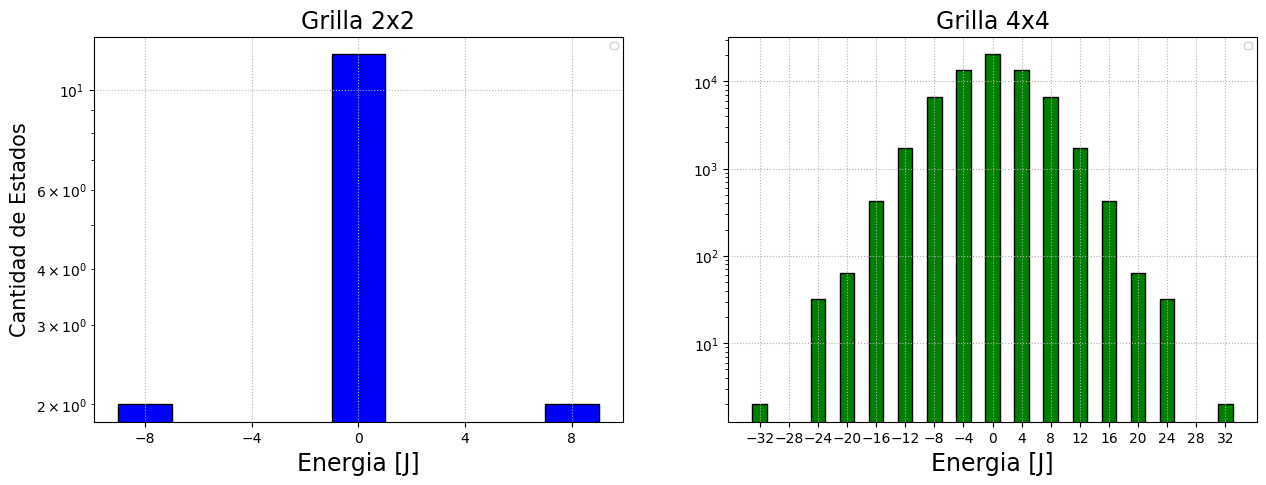

In [17]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5), dpi=100)

axes[0].bar(densidad_E_M_2x2[0],densidad_E_2x2, color='blue', edgecolor='black', width=2, log=
          True )
axes[0].set_xticks(np.arange(-8, 9, 4))
axes[0].set_title(r'Grilla 2x2',fontsize=17)
axes[0].set_ylabel(r'Cantidad de Estados', fontsize= 15)
axes[0].set_xlabel(r'Energia [J]', fontsize= 17)
axes[0].legend(fontsize=7)
axes[0].grid(True,ls = ':')

axes[1].bar(densidad_E_M_4x4[0],densidad_E_4x4, color='green', edgecolor='black', width=2, log=
          True )
axes[1].set_xticks(np.arange(-32, 33, 4))
axes[1].set_title(r'Grilla 4x4',fontsize=17)
axes[1].set_xlabel(r'Energia [J]', fontsize= 17)
axes[1].legend(fontsize=7)
axes[1].grid(True,ls = ':')
'''
axes[2].bar(densidad_E_M_6x6[0],densidad_E_6x6, color='red', edgecolor='black', width=2, log=
          True )
axes[2].set_xticks(np.arange(-72, 73, 4))
axes[2].set_title(r'Grilla 6x6',fontsize=17)
axes[2].set_xlabel(r'Energia [J]', fontsize= 17)
axes[2].legend(fontsize=7)
axes[2].grid(True,ls = ':')
'''
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_7328\3481282287.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_7328\3481282287.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(fontsize=7)


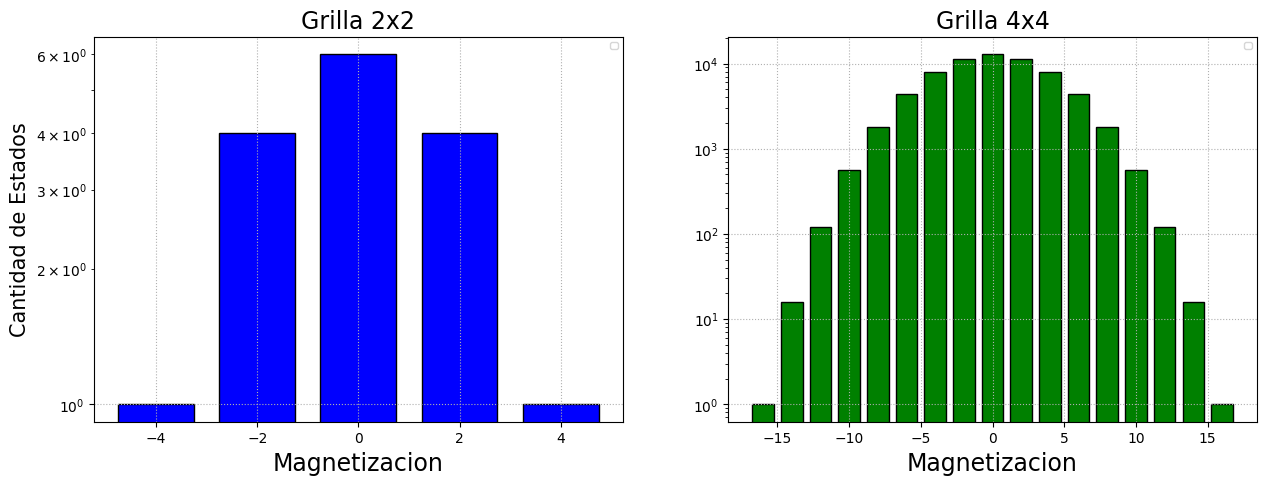

In [250]:
fig,axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5), dpi=100)

axes[0].bar(densidad_E_M_2x2[1],densidad_M_2x2, color='blue', edgecolor='black', width=1.5, log=
          True )
#axes[0].set_xticks(np.arange(0, 9, 4))
axes[0].set_title(r'Grilla 2x2',fontsize=17)
axes[0].set_ylabel(r'Cantidad de Estados', fontsize= 15)
axes[0].set_xlabel(r'Magnetizacion', fontsize= 17)
axes[0].legend(fontsize=7)
axes[0].grid(True,ls = ':')

axes[1].bar(densidad_E_M_4x4[1],densidad_M_4x4, color='green', edgecolor='black', width=1.5, log=
          True )
#axes[1].set_xticks(np.arange(0, 33, 4))
axes[1].set_title(r'Grilla 4x4',fontsize=17)
axes[1].set_xlabel(r'Magnetizacion', fontsize= 17)
axes[1].legend(fontsize=7)
axes[1].grid(True,ls = ':')
'''
axes[2].bar(densidad_E_M_6x6[1],densidad_M_6x6, color='red', edgecolor='black', width=2, log=
          True )
#axes[2].set_xticks(np.arange(0, 73, 4))
axes[2].set_title(r'Grilla 6x6',fontsize=17)
axes[2].set_xlabel(r'Magnetizacion', fontsize= 17)
axes[2].legend(fontsize=7)
axes[2].grid(True,ls = ':')
'''
plt.show()

In [97]:
def distribucion_pi_M(data,T):
    energias, magnetizaciones,nu_E_M = data
    nu_E = np.sum(nu_E_M, axis = 1) # Se determina la densidad de energia
    
    # Se calcula la funcion particion
    z = 0
    beta = 1/T
    for i in range(len(nu_E)):
        z += nu_E[i]*np.exp(-beta*energias[i])

    
    # Se calcula la distribucion en funcion de las magentizaciones
    pi_M = []

    for i in range(len(magnetizaciones)):  # Se recorren las magnetizaciones, para cada M un pi_M_i
        pi_M_i = 0                         
        for j in range(len(energias)):     # Se recorren las energias
            pi_M_i += np.exp(-beta*energias[j])*nu_E_M[j][i]  # Se suma cada elemento, sobre las energias
        pi_M.append(pi_M_i/z)                                 # Se agregan a la lista normalizando por z
        
    return magnetizaciones, pi_M


In [98]:
prop_dist_2x2_low  = distribucion_pi_M(densidad_E_M_2x2,2)
prop_dist_2x2_high = distribucion_pi_M(densidad_E_M_2x2,300)

prop_dist_4x4_low  = distribucion_pi_M(densidad_E_M_4x4,2)
prop_dist_4x4_high = distribucion_pi_M(densidad_E_M_4x4,300)

#prop_dist_6x6_low  = distribucion_pi_M(densidad_E_M_6x6,10)
#prop_dist_6x6_high = distribucion_pi_M(densidad_E_M_6x6,300)

<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\3590524815.py:40: SyntaxWarning: invalid escape sequence '\p'
  '''
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\3590524815.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0][0].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\3590524815.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0][1].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\3590524815.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes

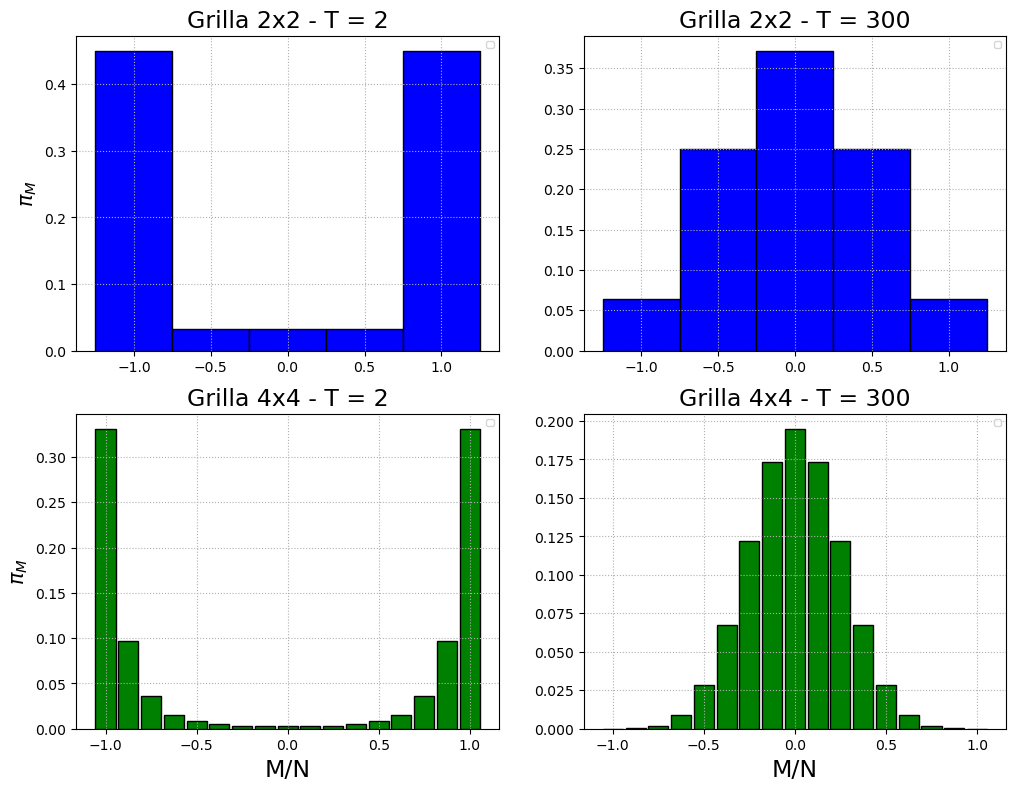

In [99]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (12,9), dpi=100)

axes[0][0].bar(prop_dist_2x2_low[0]/4,prop_dist_2x2_low[1], color='blue', edgecolor='black', width=0.5, log=
          False )

#axes[0][0].set_xticks(np.arange(-8, 9, 4))
axes[0][0].set_title(r'Grilla 2x2 - T = 2',fontsize=17)
axes[0][0].set_ylabel(r'$\pi_M$', fontsize= 15)
#axes[0][0].set_xlabel(r'M/N', fontsize= 17)
axes[0][0].legend(fontsize=7)
axes[0][0].grid(True,ls = ':')

axes[0][1].bar(prop_dist_2x2_high[0]/4,prop_dist_2x2_high[1], color='blue', edgecolor='black', width=0.5, log=
          False )
#axes[0][1].set_xticks(np.arange(-32, 33, 4))
axes[0][1].set_title(r'Grilla 2x2 - T = 300',fontsize=17)
#axes[0][1].set_xlabel(r'M/N', fontsize= 17)
axes[0][1].legend(fontsize=7)
axes[0][1].grid(True,ls = ':')


axes[1][0].bar(prop_dist_4x4_low[0]/16,prop_dist_4x4_low[1], color='g', edgecolor='black', width=0.11, log=
          False )
#axes[1][0].set_xticks(np.arange(-72, 73, 4))
axes[1][0].set_title(r'Grilla 4x4 - T = 2',fontsize=17)
axes[1][0].set_ylabel(r'$\pi_M$', fontsize= 15)
axes[1][0].set_xlabel(r'M/N', fontsize= 17)
axes[1][0].legend(fontsize=7)
axes[1][0].grid(True,ls = ':')


axes[1][1].bar(prop_dist_4x4_high[0]/16,prop_dist_4x4_high[1], color='g', edgecolor='black', width=0.11, log=
          False )
#axes[1][1].set_xticks(np.arange(-72, 73, 4))
axes[1][1].set_title(r'Grilla 4x4 - T = 300',fontsize=17)
axes[1][1].set_xlabel(r'M/N', fontsize= 17)
axes[1][1].legend(fontsize=7)
axes[1][1].grid(True,ls = ':')

'''
axes[2][0].bar(prop_dist_6x6_low[0]/36,prop_dist_6x6_low[1], color='red', edgecolor='black', width=2, log=
          True )
#axes[2][0].set_xticks(np.arange(-72, 73, 4))
axes[2][0].set_title(r'Grilla 6x6 - T = 10',fontsize=17)
axes[2][0].set_ylabel(r'\pi_M', fontsize= 15)
axes[2][0].set_xlabel(r'M/N', fontsize= 17)
axes[2][0].legend(fontsize=7)
axes[2][0].grid(True,ls = ':')


axes[2][1].bar(prop_dist_6x6_high[0]/36,prop_dist_6x6_high[1], color='red', edgecolor='black', width=2, log=
          True )
#axes[2][1].set_xticks(np.arange(-72, 73, 4))
axes[2][1].set_title(r'Grilla 6x6 - T = 300',fontsize=17)
axes[2][1].set_xlabel(r'M/N', fontsize= 17)
axes[2][1].legend(fontsize=7)
axes[2][1].grid(True,ls = ':')
'''
plt.show()

In [34]:
def Binder_cumulant(data):
    energias, magnetizaciones ,nu_E_M = data
    N = magnetizaciones[-1]
    k_B = 1.38*10**(-23)
    T_s = np.arange(1,4,0.2)
    blinder_cumulant = []

    for T in tqdm(T_s):
        z = 0
        m_4 = 0 # Sera <m**4> para cada T
        m_2 = 0 # Sera <m**2>
        beta = 1/T
        for i in range(len(magnetizaciones)):
            for j in range(len(energias)):
                z += np.exp(-beta*energias[j])*nu_E_M[j][i]
                m_4 += (magnetizaciones[i]/N)**4 * np.exp(-beta*energias[j])*nu_E_M[j][i]
                m_2 += (magnetizaciones[i]/N)**2 * np.exp(-beta*energias[j])*nu_E_M[j][i]
        m_4 = m_4/z
        m_2 = m_2/z
        b = 1/2*(3 - m_4/m_2**2)     
        blinder_cumulant.append(b)

    return T_s, blinder_cumulant

In [292]:
data_2B_binder_cumulant_2x2 = Binder_cumulant(densidad_E_M_2x2)
data_2B_binder_cumulant_4x4 = Binder_cumulant(densidad_E_M_4x4)
#data_2B_binder_cumulant_6x6 = Binder_cumulant(densidad_E_M_6x6)

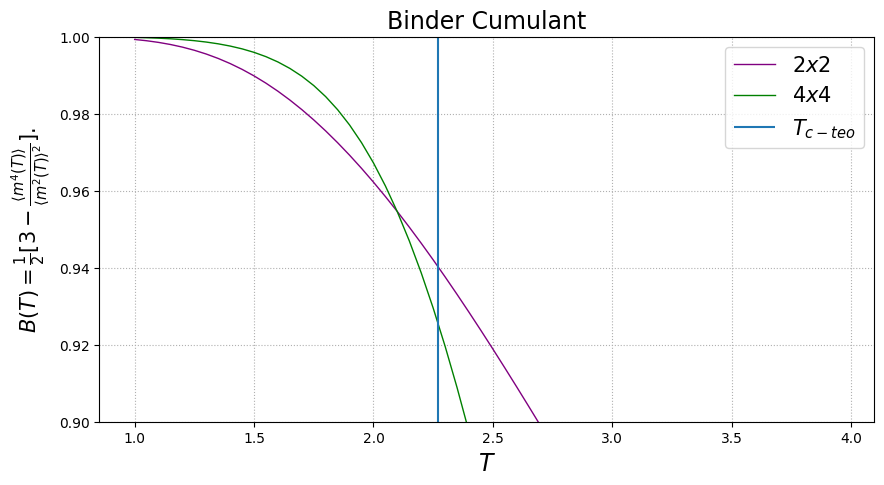

In [293]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)

axes.plot(data_2B_binder_cumulant_2x2[0],data_2B_binder_cumulant_2x2[1], c= 'purple', lw = 1,label = r"$2x2$")
axes.plot(data_2B_binder_cumulant_4x4[0],data_2B_binder_cumulant_4x4[1], c= 'green', lw = 1,label = r"$4x4$")
#axes.plot(data_2B_binder_cumulant_6x6[0],data_2B_binder_cumulant_6x6[1], c= 'tomato', lw = 1,label = r"$6x6$")

axes.vlines(2/np.log(1 + np.sqrt(2)),0.8,1.2,label = r"$T_{c-teo}$")

axes.set_title(r'Binder Cumulant',fontsize=17)
axes.set_ylabel(r'$B(T) = \frac{1}{2} [3 −\frac{⟨m^4(T)⟩}{⟨m^2(T)⟩^2}]$.', fontsize= 15)
axes.set_xlabel(r'$T$', fontsize= 17)
axes.set_ylim(0.9,1)
axes.legend(fontsize=15)

plt.grid(True,ls = ':')
plt.show()

### P3
Implemente el algoritmo markov-ising (clase 5, slide 23), i.e., el algorimto local de Metropolis para el modelo de Ising. Ocupelo para medir la energía y el calor específico como función de la temperatura para una red de $6x6$ con condiciones de borde periódica. Compare sus resultados (mínimo 4 cifras significativas) con los resultados exactos en la tabla en la slide 17 clase 5. Genere gráficos de la magnetización absoluta promedio como función de la temperatura para redes de distintos tamaños ($4×4$, $8×8$, $16×16$ y $32×32$).

In [156]:
@jit
def markov_ising_energia(d,total_samples,step_muentra,rtime,T, estado_inicial):
    N = d**2
    beta = 1/T
    energias = np.arange(-2*N,2*N+1,4)
    densidad_energia = np.array([0]*len(energias))
    estado_actual = estado_inicial
    historia = []
    energia_actual = 0
    for i, ex in enumerate(estado_actual):
        energia_actual += ex*campo_molecular_con_cdp(estado_actual,i,d)
    energia_actual = -energia_actual/2


    cadena_flip = np.random.randint(0,N,size=total_samples) # numeros entre 0,N-1
    cadena_prob = np.random.rand(total_samples) # numeros entre 0,1

    for i in (range(total_samples)):     
        k = cadena_flip[i]
        h = campo_molecular_con_cdp(estado_actual,k,d)
        delta_E = 2*estado_actual[k]*h # notar que es +, ya que es el spin antes de flipiar
        gamma = np.exp(-beta*delta_E)
        
        if cadena_prob[i] < gamma:
            estado_actual[k] *=-1
            energia_actual += delta_E

        if i > rtime:  # concidera un tiempo de relajacion antes de comenzar a contar
            if i%step_muentra == 0: # cada cierto step se cuenta el estado (siempre estados aceptados)
                ind = list(energias).index(energia_actual)
                densidad_energia[ind] += 1
        if i%10000 == 0:
            historia.append(energia_actual)
    return historia, energias, densidad_energia

In [157]:
estado_i = np.random.randint(2, size=36) * 2 - 1
sample_1 =  markov_ising_energia(6,10**7,500,100000,300,estado_i)
sample_2 =  markov_ising_energia(6,10**7,500,100000,2,estado_i)
#sample_3 =  markov_ising_energia(6,10**7,500,100000,2)

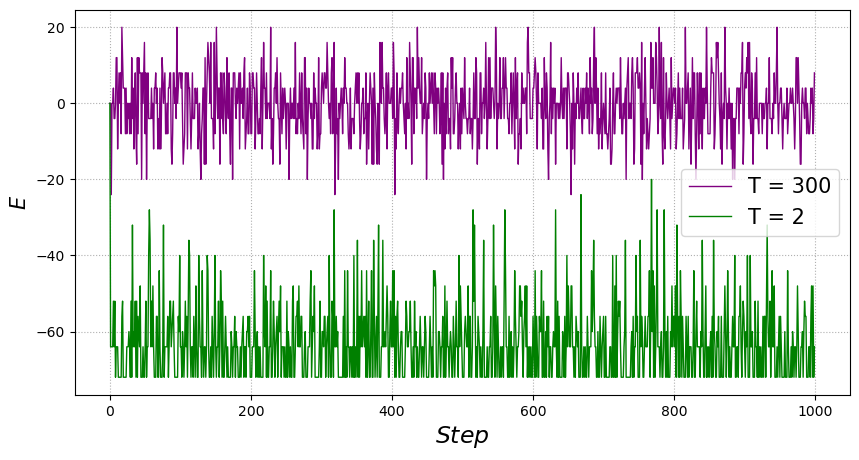

In [158]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)

x = np.arange(0,len(sample_1[0]))

axes.plot(x,sample_1[0], c= 'purple', lw = 1, label = "T = 300" )
axes.plot(x,sample_2[0], c= 'green', lw = 1, label = "T = 2" )
axes.set_ylabel(r'$E$', fontsize= 15)
axes.set_xlabel(r'$Step$', fontsize= 17)
plt.legend(fontsize=15)
plt.grid(True,ls = ':')
plt.show()

In [159]:
print("Caso 6x6 | T = 300 | sample = 10^7 | step = 500")
print("Energia - Cantidad ")
for i in range(len(sample_1[1])):
    print(sample_1[1][i],"   ",sample_1[2][i])


Caso 6x6 | T = 300 | sample = 10^7 | step = 500
Energia - Cantidad 
-72     0
-68     0
-64     0
-60     0
-56     0
-52     0
-48     0
-44     0
-40     0
-36     0
-32     7
-28     22
-24     82
-20     231
-16     642
-12     1288
-8     2537
-4     3446
0     3786
4     3305
8     2331
12     1226
16     585
20     213
24     76
28     17
32     3
36     1
40     0
44     1
48     0
52     0
56     0
60     0
64     0
68     0
72     0


In [160]:
print("Caso 6x6 | T = 2 | sample = 10^7 | step = 500")
print("Energia - Cantidad ")
for i in range(len(sample_1[1])):
    print(sample_2[1][i],"   ",sample_2[2][i])

Caso 6x6 | T = 2 | sample = 10^7 | step = 500
Energia - Cantidad 
-72     7721
-68     0
-64     5292
-60     1436
-56     2052
-52     1076
-48     824
-44     549
-40     357
-36     228
-32     143
-28     70
-24     35
-20     12
-16     3
-12     1
-8     0
-4     0
0     0
4     0
8     0
12     0
16     0
20     0
24     0
28     0
32     0
36     0
40     0
44     0
48     0
52     0
56     0
60     0
64     0
68     0
72     0


In [161]:
def energia_calor_especifico(muestra,T,d):
    N = d**2
    beta = 1/T
    _, energias, desidad_energia = muestra

    E_mean   = 0
    E_mean_2 = 0
    z = 0
    '''
    #E_min = energias[0]
    for i in range(len(energias)):
        z        += desidad_energia[i] * np.exp(-beta*energias[i])
        E_mean   += desidad_energia[i] * np.exp(-beta*energias[i]) * (energias[i])
        E_mean_2 += desidad_energia[i] * np.exp(-beta*energias[i]) * (energias[i])**2
    '''
    sum_E = np.sum(desidad_energia*np.exp(-beta*energias)*energias)
    sum_E_2 = np.sum(desidad_energia*np.exp(-beta*energias)*energias**2)
    z = np.sum(desidad_energia*np.exp(-beta*energias))

    E_mean   = sum_E/z
    E_mean_2 = sum_E_2/z


    c_v = beta**2/N * (E_mean_2 - E_mean**2)
    return (E_mean)/N, c_v 
    

In [162]:
info_s1 = energia_calor_especifico(sample_1,300,6)
info_s2 = energia_calor_especifico(sample_2,2,6)
print(f"<E/N> = {info_s1[0]:.5f} | c_v = {info_s1[1]:.5f} | T = 300")
print(f"<E/N> = {info_s2[0]:.5f} | c_v = {info_s2[1]:.5f} | T = 2")

<E/N> = -0.01298 | c_v = 0.00002 | T = 300
<E/N> = -1.99705 | c_v = 0.00606 | T = 2


In [163]:
T = np.arange(0.2,10.1,0.2)
c_v_por_T = []
for T_s in tqdm(T):
    data = markov_ising_energia(6,10**6,500,10000,T_s,estado_i)
    tupla =  energia_calor_especifico(data,T_s,6)
    c_v_por_T.append(tupla[1])

    


100%|██████████| 50/50 [00:02<00:00, 20.84it/s]


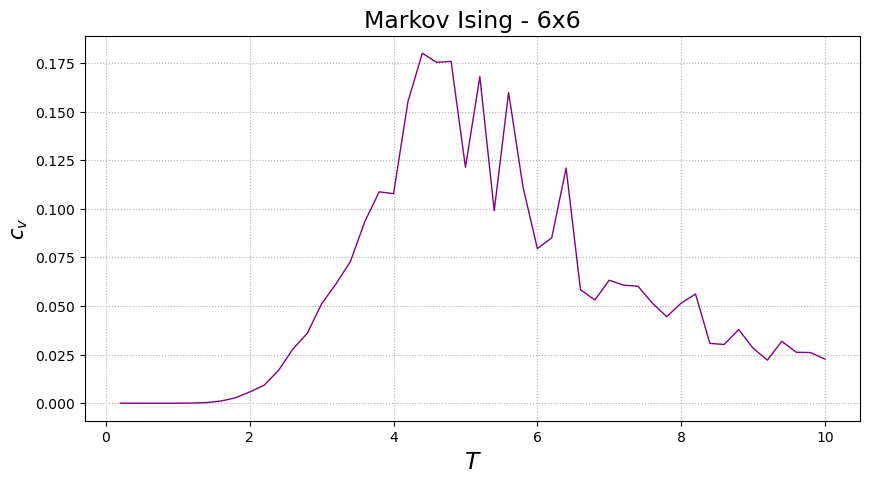

In [164]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)
axes.plot(T,c_v_por_T, c= 'purple', lw = 1)
axes.set_title(r'Markov Ising - 6x6',fontsize=17)
axes.set_ylabel(r'$c_v$', fontsize= 15)
axes.set_xlabel(r'$T$', fontsize= 17)

#plt.legend(fontsize=15)
plt.grid(True,ls = ':')
plt.show()

In [128]:
@jit
def markov_ising_mag_2(d,total_samples,step_muentra,rtime,T,estado_inicial):
    N = d**2
    beta = 1/T
    energias = np.arange(-2*N,2*N + 1,4)       # Valores posibles de energia con step = 4 
    magnetizaciones = np.arange(-N, N + 1,2)   # Valores posibles de magnetizacion con step = 2

    estado_actual = estado_inicial
    energia_actual = 0
    for i, ex in enumerate(estado_actual):
        energia_actual += ex*campo_molecular_con_cdp(estado_actual,i,d) #Sumo cada interaccion
    energia_actual = -energia_actual/2  # agrego el -1 y divido en 2 por el sobre conteo 

    magentizacion_actual =  np.sum(estado_actual)

    densidad_estados_E_M = np.zeros((len(energias),len(magnetizaciones)), dtype=np.int64) # Genera un matriz, fila = energia, col = magnetizacion
    
    ind_E = list(energias).index(energia_actual)
    ind_M = list(magnetizaciones).index(magentizacion_actual)
    densidad_estados_E_M[ind_E][ind_M] += 1

    cadena_flip = np.random.randint(0,N,size=total_samples) # numeros entre 0,N-1
    cadena_prob = np.random.rand(total_samples) # numeros entre 0,1
    
    for i in range(total_samples):     
        k = cadena_flip[i]
        h = campo_molecular_con_cdp(estado_actual,k,d)
        delta_E = 2*estado_actual[k]*h # notar que es +, ya que es el spin antes de flipiar
        gamma = np.exp(-beta*delta_E)
        
        if cadena_prob[i] < gamma:
            estado_actual[k] *=-1
            energia_actual += delta_E

        if i > rtime:  # concidera un tiempo de relajacion antes de comenzar a contar
            if i%step_muentra == 0: # cada cierto step se cuenta el estado (siempre estados aceptados)
                ind_E = list(energias).index(energia_actual)
                ind_M = list(magnetizaciones).index(magentizacion_actual)
                densidad_estados_E_M[ind_E][ind_M] += 1


    return energias, magnetizaciones, densidad_estados_E_M

In [183]:
def calculo_mag_abs(muestra,d,T):
    N = d**2
    beta = 1/T
    energias, magenetizaciones, desidad_E_M = muestra
    
    z   = np.sum(desidad_E_M*np.exp(-beta*energias))
    sum_M = np.sum(np.abs(magenetizaciones)*np.exp(-beta*energias) * desidad_E_M)
    M_mean = sum_M/z
    m_mean  = M_mean/N
    return m_mean

In [184]:
def magnetizacion_temperatura_markov(d):
    T_s = np.arange(0.2,5,0.1)  # Se generan el set de Temperaturas
    mag_abs_prop = []
    estado_i = np.array([random.choice([1, -1]) for _ in range(d**2)])
    for t in tqdm(T_s):  
            datos_sample = markov_ising_mag_2(d,10**6,1000,10000,t,estado_i)
            m_mean = calculo_mag_abs(datos_sample,d,t)    
            mag_abs_prop.append(m_mean) 
    return T_s, mag_abs_prop

In [185]:
caso_4x4_P3 = magnetizacion_temperatura_markov(4)

100%|██████████| 48/48 [00:01<00:00, 25.95it/s]


In [186]:
caso_8x8_P3 = magnetizacion_temperatura_markov(8)

100%|██████████| 48/48 [00:01<00:00, 28.55it/s]


In [187]:
caso_16x16_P3 = magnetizacion_temperatura_markov(16)

  0%|          | 0/48 [00:00<?, ?it/s]C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:6: RuntimeWarning: overflow encountered in exp
  z   = np.sum(desidad_E_M*np.exp(-beta*energias))
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:6: RuntimeWarning: invalid value encountered in multiply
  z   = np.sum(desidad_E_M*np.exp(-beta*energias))
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:7: RuntimeWarning: overflow encountered in exp
  sum_M = np.sum(np.abs(magenetizaciones)*np.exp(-beta*energias) * desidad_E_M)
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:7: RuntimeWarning: invalid value encountered in multiply
  sum_M = np.sum(np.abs(magenetizaciones)*np.exp(-beta*energias) * desidad_E_M)
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:7: RuntimeWarning: overflow encountered in multiply
  sum_M = np.sum(np.abs(magenetizaciones)*np.exp(-beta*energias) * desidad_E_M)
100%|██████████| 48/48 [00:01<00:00, 28.82it/

In [188]:
caso_32x32_P3 = magnetizacion_temperatura_markov(32)

  0%|          | 0/48 [00:00<?, ?it/s]C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:6: RuntimeWarning: overflow encountered in exp
  z   = np.sum(desidad_E_M*np.exp(-beta*energias))
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:6: RuntimeWarning: invalid value encountered in multiply
  z   = np.sum(desidad_E_M*np.exp(-beta*energias))
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:7: RuntimeWarning: overflow encountered in exp
  sum_M = np.sum(np.abs(magenetizaciones)*np.exp(-beta*energias) * desidad_E_M)
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:7: RuntimeWarning: invalid value encountered in multiply
  sum_M = np.sum(np.abs(magenetizaciones)*np.exp(-beta*energias) * desidad_E_M)
C:\Users\nicol\AppData\Local\Temp\ipykernel_8784\4045368699.py:7: RuntimeWarning: overflow encountered in multiply
  sum_M = np.sum(np.abs(magenetizaciones)*np.exp(-beta*energias) * desidad_E_M)
100%|██████████| 48/48 [00:02<00:00, 22.80it/

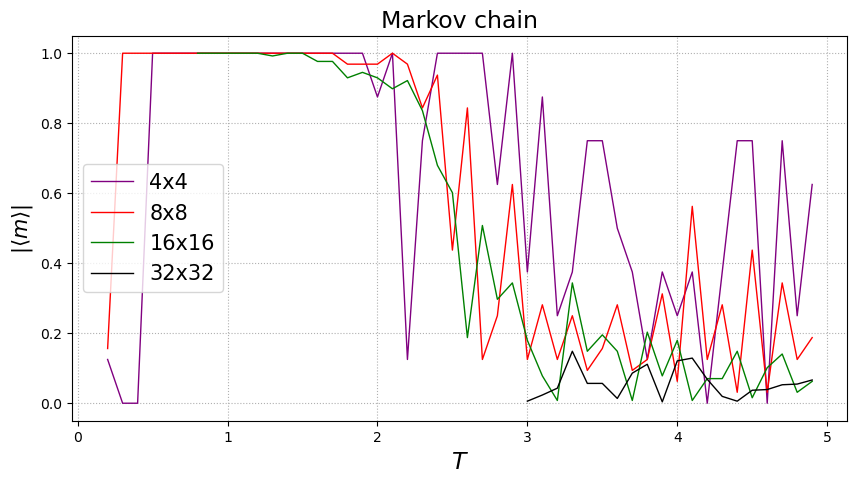

In [189]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)
T = np.arange(0.2,5,0.1)
axes.plot(T,caso_4x4_P3[1], c= 'purple', lw = 1, label = "4x4" )
axes.plot(T,caso_8x8_P3[1], c= 'red', lw = 1, label = "8x8" )
axes.plot(T,caso_16x16_P3[1], c= 'green', lw = 1, label = "16x16" )
axes.plot(T,caso_32x32_P3[1], c= 'black', lw = 1, label = "32x32" )



axes.set_title(r'Markov chain',fontsize=17)
axes.set_ylabel(r'$|⟨m⟩|$', fontsize= 15)
axes.set_xlabel(r'$T$', fontsize= 17)

plt.legend(fontsize=15)
plt.grid(True,ls = ':')
plt.show()

### P4

Implemente el algoritmo cluster-ising (clase 5, slide 34), i.e., el algoritmo de Wolff. Ocupelo para medir la energía y el calor específico como función de la temperatura para una red de 6x6 con condiciones de borde periódica. Compare sus resultados (mínimo 4 cifras significativas) con los resultados exactos en la tabla en la slide 17 clase 5. Usando este algoritmo, obtenga y grafique histogramas de la magnetización, y el Binder cumulant como función de la temperatura para redes de tamaño 6×6, 16×16, 32×32 y 64×64. Vuelva a verificar que los Binder cumulants se intersectan casi exactamente en Tc (ver problema 2).

In [3]:
@jit
def add_vecinos_candidatos(cadena,i,dim,cluster):
    nuevos_candidatos = []
    fil = i//dim
    col = i%dim

    if col == 0:
        if cadena[i] == cadena[i + 1]:
            nuevos_candidatos.append(i + 1)
    elif col == dim - 1:
        if cadena[i] == cadena[i - 1]:
            nuevos_candidatos.append(i - 1)
    else:
        if cadena[i] == cadena[i + 1]:
            nuevos_candidatos.append(i + 1)
        if cadena[i] == cadena[i - 1]:
            nuevos_candidatos.append(i - 1)
    
    if fil == 0:
        if cadena[i] == cadena[i + dim]:
            nuevos_candidatos.append(i + dim)
    elif fil == dim - 1:
        if cadena[i] == cadena[i - dim]:
            nuevos_candidatos.append(i - dim)
    else:
        if cadena[i] == cadena[i + dim]:
            nuevos_candidatos.append(i + dim)
        if cadena[i] == cadena[i - dim]:
            nuevos_candidatos.append(i - dim)
    lista = []
    for i in nuevos_candidatos:
        if i not in cluster:
            lista.append(i)
    return lista

In [4]:
@jit
def bluid_cluster(spins,inicio,dim,T):
    N = dim**2
    cluster = [inicio]
    beta = 1/T
    p = 1 - np.exp(-2*beta)

    candidatos = []
    candidatos.extend(add_vecinos_candidatos(spins,inicio,dim,cluster))
    cadena_prob = np.random.rand(2*N) # N numeros entre 0,1 (el maximo de candidatos que puede haber)
    k = 0
    while len(candidatos) !=0:
        if cadena_prob[k] <= p:
            elemento_nuevo = candidatos[0]
            cluster.append(elemento_nuevo) # Agrego el elemento
            candidatos.extend(add_vecinos_candidatos(spins,elemento_nuevo,dim,cluster)) # agrego vecinos a candidatos
            candidatos = [x for x in candidatos if x != elemento_nuevo]   # saco elemento de candidatos - si esta repetido tambien 
        else:
            candidatos = candidatos[1:] # Se quita un candidatos de la lista
        k +=1

    return cluster

In [21]:
def cluster_ising_E_mag(d,total_samples,step_muentra,rtime,T,estado_inicial):
    N = d**2
    energias = np.arange(-2*N,2*N + 1,4)       # Valores posibles de energia con step = 4 
    magnetizaciones = np.arange(-N, N + 1,2)   # Valores posibles de magnetizacion con step = 2
    
    estado_actual = estado_inicial
    energia_actual = 0
    for i, ex in enumerate(estado_actual):
        energia_actual += ex*campo_molecular_con_cdp(estado_actual,i,d)
    energia_actual = -energia_actual/2

    magentizacion_actual =  np.sum(estado_actual)

    densidad_estados_E_M = np.zeros((len(energias),len(magnetizaciones)), dtype=np.int64) # Genera un matriz, fila = energia, col = magnetizacion
    densidad_estados_E_M[list(energias).index(energia_actual)][list(magnetizaciones).index(magentizacion_actual)] += 1
    cadena_inicio_cluster = np.random.randint(0,N,size=total_samples)
    

    for i in tqdm(range(total_samples)): 
        indices_flip  = bluid_cluster(estado_actual,cadena_inicio_cluster[i],d,T)
        for j in indices_flip:
            estado_actual[j] *= -1
            h = campo_molecular_con_cdp(estado_actual,j,d)
            delta_E = -2*estado_actual[j]*h # notar que es -, ya que es el spin despues de flipiar
            energia_actual += delta_E


        if i > rtime:  # concidera un tiempo de relajacion antes de comenzar a contar
            if i%step_muentra == 0: # cada cierto step se cuenta el estado (siempre estados aceptados)
                ind_E = list(energias).index(energia_actual)
                ind_M = list(magnetizaciones).index(magentizacion_actual)
                densidad_estados_E_M[ind_E][ind_M] += 1


    return energias, magnetizaciones, densidad_estados_E_M

In [17]:
estado_06_i = np.array([random.choice([1, -1]) for _ in range(6**2)])
estado_16_i = np.array([random.choice([1, -1]) for _ in range(16**2)])
estado_32_i = np.array([random.choice([1, -1]) for _ in range(32**2)])
estado_64_i = np.array([random.choice([1, -1]) for _ in range(64**2)])

In [22]:

sample_P4_06x06 = cluster_ising_E_mag(6,10**5,100,1000,2,estado_06_i)


  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:02<00:00, 49244.21it/s]


In [23]:
sample_P4_16x16 = cluster_ising_E_mag(16,10**4,10,100,2,estado_16_i)


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:02<00:00, 4849.82it/s]


In [24]:
sample_P4_32x32 = cluster_ising_E_mag(32,10**4,10,100,2,estado_32_i)


100%|██████████| 10000/10000 [00:11<00:00, 847.23it/s]


In [25]:
sample_P4_64x64 = cluster_ising_E_mag(64,2*10**3,10,100,2,estado_64_i)

100%|██████████| 2000/2000 [00:17<00:00, 113.06it/s]


In [27]:
def energia_calor_especifico_shif_P4(muestra,T,d):
    N = d**2
    beta = 1/T
    energias, _, desidad_energia_m = muestra
    desidad_energia = np.sum(desidad_energia_m, axis = 0)
    E_min = energias[0]
 
    z        = np.sum(desidad_energia * np.exp(-beta*energias - E_min))
    E_mean   = np.sum(desidad_energia * np.exp(-beta*energias - E_min) * (energias - E_min))
    E_mean_2 = np.sum(desidad_energia * np.exp(-beta*energias - E_min) * (energias - E_min)**2)
    z = z*np.exp(-beta*E_min)
    E_mean   = E_mean/z
    E_mean_2 = E_mean_2/z


    c_v = beta**2/N * (E_mean_2 - E_mean**2)
    return (E_mean + E_min)/N, c_v 
    

In [28]:
energia_calor_especifico_shif_P4(sample_P4_06x06,2,6)

(np.float64(-1.9999999999999991), np.float64(2.167465222483157e-14))

In [29]:
densidad_M_06x06 = np.sum(sample_P4_06x06[2], axis = 0)
densidad_M_16x16 = np.sum(sample_P4_16x16[2], axis = 0)
densidad_M_32x32 = np.sum(sample_P4_32x32[2], axis = 0)
densidad_M_64x64 = np.sum(sample_P4_64x64[2], axis = 0)

C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\1477014267.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0][0].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\1477014267.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0][1].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\1477014267.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1][0].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\1477014267.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ig

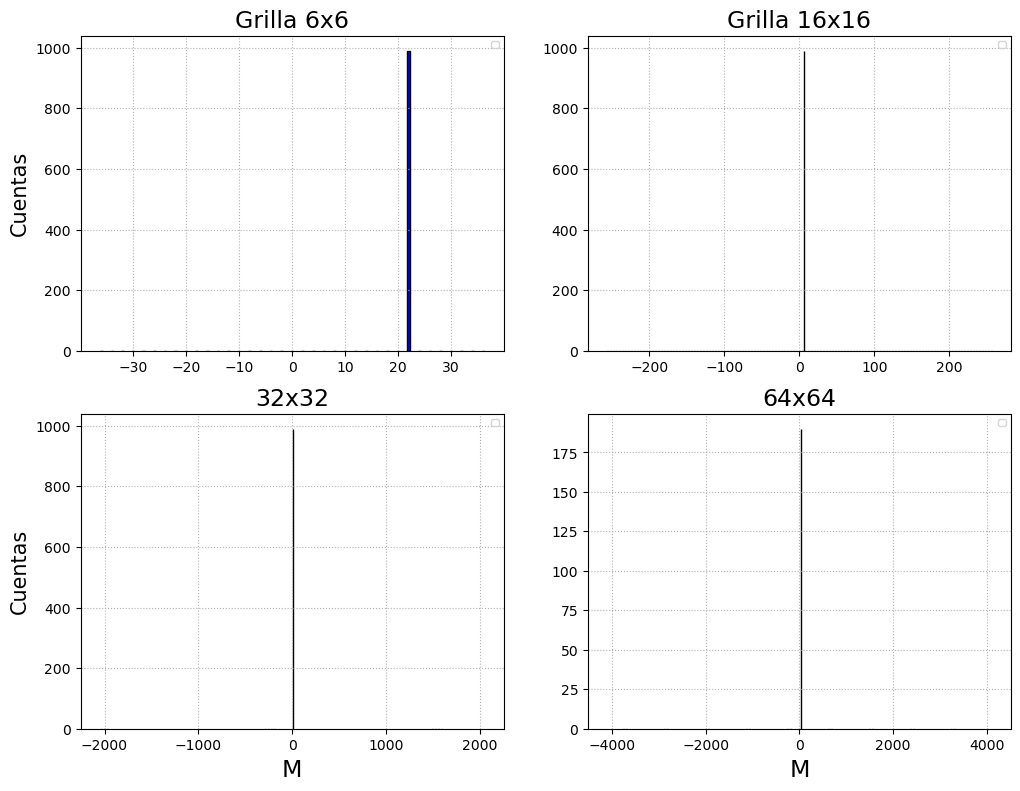

In [30]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (12,9), dpi=100)

axes[0][0].bar(sample_P4_06x06[1],densidad_M_06x06, color='blue', edgecolor='black', width=0.5, log=
          False )

#axes[0][0].set_xticks(np.arange(-8, 9, 4))
axes[0][0].set_title(r'Grilla 6x6',fontsize=17)
axes[0][0].set_ylabel(r'Cuentas', fontsize= 15)
#axes[0][0].set_xlabel(r'M/N', fontsize= 17)
axes[0][0].legend(fontsize=7)
axes[0][0].grid(True,ls = ':')

axes[0][1].bar(sample_P4_16x16[1],densidad_M_16x16, color='blue', edgecolor='black', width=0.5, log=
          False )
#axes[0][1].set_xticks(np.arange(-32, 33, 4))
axes[0][1].set_title(r'Grilla 16x16',fontsize=17)
#axes[0][1].set_xlabel(r'M/N', fontsize= 17)
axes[0][1].legend(fontsize=7)
axes[0][1].grid(True,ls = ':')


axes[1][0].bar(sample_P4_32x32[0],densidad_M_32x32, color='g', edgecolor='black', width=0.11, log=
          False )
#axes[1][0].set_xticks(np.arange(-72, 73, 4))
axes[1][0].set_title(r'32x32',fontsize=17)
axes[1][0].set_ylabel(r'Cuentas', fontsize= 15)
axes[1][0].set_xlabel(r'M', fontsize= 17)
axes[1][0].legend(fontsize=7)
axes[1][0].grid(True,ls = ':')


axes[1][1].bar(sample_P4_64x64[1],densidad_M_64x64, color='g', edgecolor='black', width=0.11, log=
          False )
#axes[1][1].set_xticks(np.arange(-72, 73, 4))
axes[1][1].set_title(r'64x64',fontsize=17)
axes[1][1].set_xlabel(r'M', fontsize= 17)
axes[1][1].legend(fontsize=7)
axes[1][1].grid(True,ls = ':')

In [31]:
hist_06 = np.repeat(sample_P4_06x06[1],densidad_M_06x06)
hist_16 = np.repeat(sample_P4_16x16[1],densidad_M_16x16)
hist_32 = np.repeat(sample_P4_32x32[1],densidad_M_32x32)
hist_64 = np.repeat(sample_P4_64x64[1],densidad_M_64x64)

C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\665666384.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0][0].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\665666384.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0][1].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\665666384.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1][0].legend(fontsize=7)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\665666384.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignore

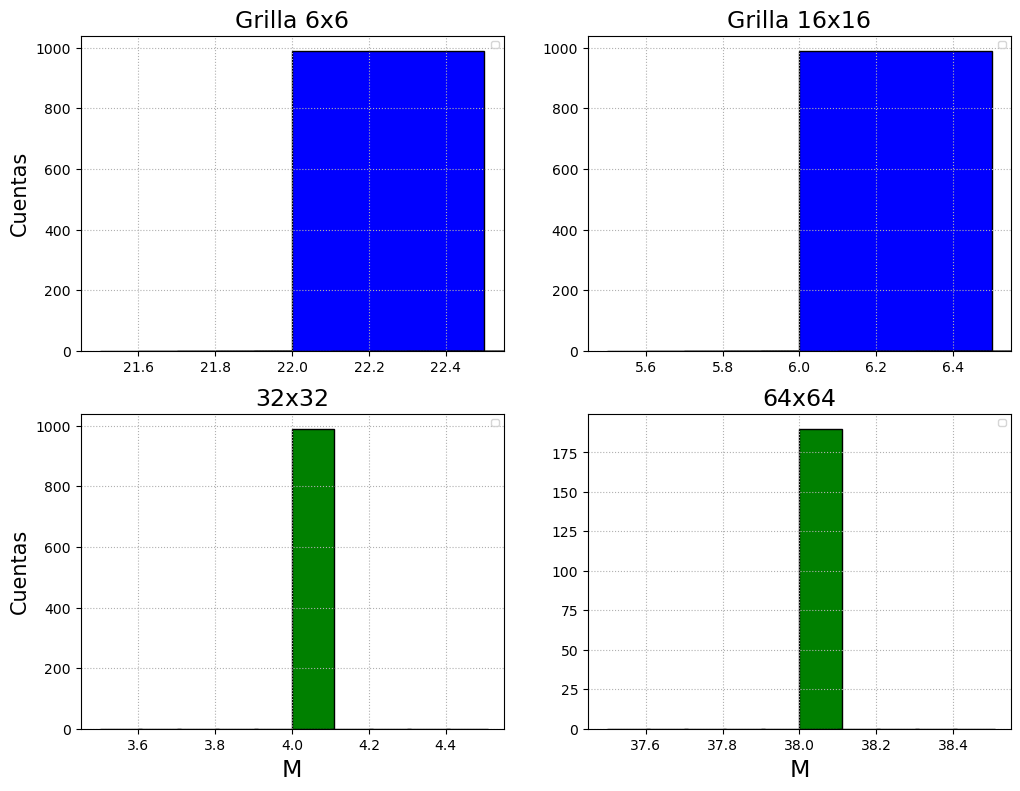

In [32]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (12,9), dpi=100)

axes[0][0].hist(hist_06, color='blue', edgecolor='black', width=0.5, log=
          False )

#axes[0][0].set_xticks(np.arange(-8, 9, 4))
axes[0][0].set_title(r'Grilla 6x6',fontsize=17)
axes[0][0].set_ylabel(r'Cuentas', fontsize= 15)
#axes[0][0].set_xlabel(r'M/N', fontsize= 17)
axes[0][0].legend(fontsize=7)
axes[0][0].grid(True,ls = ':')

axes[0][1].hist(hist_16, color='blue', edgecolor='black', width=0.5, log=
          False )
#axes[0][1].set_xticks(np.arange(-32, 33, 4))
axes[0][1].set_title(r'Grilla 16x16',fontsize=17)
#axes[0][1].set_xlabel(r'M/N', fontsize= 17)
axes[0][1].legend(fontsize=7)
axes[0][1].grid(True,ls = ':')


axes[1][0].hist(hist_32, color='g', edgecolor='black', width=0.11, log=
          False )
#axes[1][0].set_xticks(np.arange(-72, 73, 4))
axes[1][0].set_title(r'32x32',fontsize=17)
axes[1][0].set_ylabel(r'Cuentas', fontsize= 15)
axes[1][0].set_xlabel(r'M', fontsize= 17)
axes[1][0].legend(fontsize=7)
axes[1][0].grid(True,ls = ':')


axes[1][1].hist(hist_64, color='g', edgecolor='black', width=0.11, log=
          False )
#axes[1][1].set_xticks(np.arange(-72, 73, 4))
axes[1][1].set_title(r'64x64',fontsize=17)
axes[1][1].set_xlabel(r'M', fontsize= 17)
axes[1][1].legend(fontsize=7)
axes[1][1].grid(True,ls = ':')

In [35]:
binder_P4_06x06 = Binder_cumulant(sample_P4_06x06)



100%|██████████| 15/15 [00:00<00:00, 163.97it/s]


In [36]:
binder_P4_16x16 = Binder_cumulant(sample_P4_16x16)


100%|██████████| 15/15 [00:02<00:00,  5.39it/s]


In [37]:
binder_P4_32x32 = Binder_cumulant(sample_P4_32x32)


  0%|          | 0/15 [00:00<?, ?it/s]C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:15: RuntimeWarning: overflow encountered in exp
  z += np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:15: RuntimeWarning: invalid value encountered in scalar multiply
  z += np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:16: RuntimeWarning: overflow encountered in exp
  m_4 += (magnetizaciones[i]/N)**4 * np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  m_4 += (magnetizaciones[i]/N)**4 * np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:17: RuntimeWarning: overflow encountered in exp
  m_2 += (magnetizaciones[i]/N)**2 * np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491

In [38]:
binder_P4_64x64 = Binder_cumulant(sample_P4_64x64)

  0%|          | 0/15 [00:00<?, ?it/s]C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:15: RuntimeWarning: overflow encountered in exp
  z += np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:15: RuntimeWarning: invalid value encountered in scalar multiply
  z += np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:16: RuntimeWarning: overflow encountered in exp
  m_4 += (magnetizaciones[i]/N)**4 * np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  m_4 += (magnetizaciones[i]/N)**4 * np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491608252.py:17: RuntimeWarning: overflow encountered in exp
  m_2 += (magnetizaciones[i]/N)**2 * np.exp(-beta*energias[j])*nu_E_M[j][i]
C:\Users\nicol\AppData\Local\Temp\ipykernel_18460\491

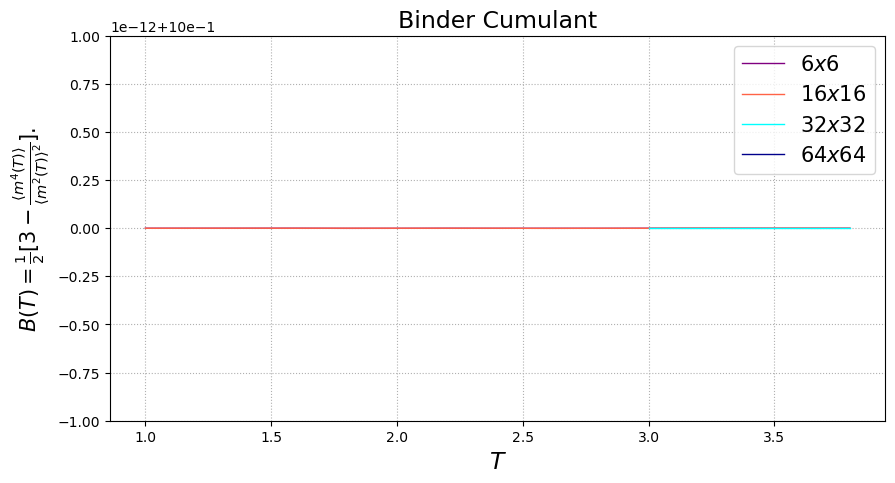

In [39]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize = (10,5), dpi=100)

axes.plot(binder_P4_06x06[0],binder_P4_06x06[1], c= 'purple', lw = 1,label = r"$6x6$")
axes.plot(binder_P4_16x16[0],binder_P4_16x16[1], c= 'tomato', lw = 1,label = r"$16x16$")
axes.plot(binder_P4_32x32[0],binder_P4_32x32[1], c= 'aqua', lw = 1,label = r"$32x32$")
axes.plot(binder_P4_64x64[0],binder_P4_64x64[1], c= 'darkblue', lw = 1,label = r"$64x64$")


#axes.vlines(2/np.log(1 + np.sqrt(2)),0.8,1.2,label = r"$T_{c-teo}$")

axes.set_title(r'Binder Cumulant',fontsize=17)
axes.set_ylabel(r'$B(T) = \frac{1}{2} [3 −\frac{⟨m^4(T)⟩}{⟨m^2(T)⟩^2}]$.', fontsize= 15)
axes.set_xlabel(r'$T$', fontsize= 17)
#axes.set_ylim(0.9,1)
axes.legend(fontsize=15)

plt.grid(True,ls = ':')
plt.show()